# IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat

# LOADING DATASET

In [2]:
data=pd.read_csv("Iris.csv",index_col="Id")
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# BASIC OVERVIEW OF DATASET

In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# DATA TYPES OF ATTRIBUTES OF DATASET 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## CHECKING NULL VALUES

In [8]:
data.isnull().count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

# DETERMINING DEPENDENT AND INDEPENDENT ATTRIBUTES

In [9]:
import seaborn as sns

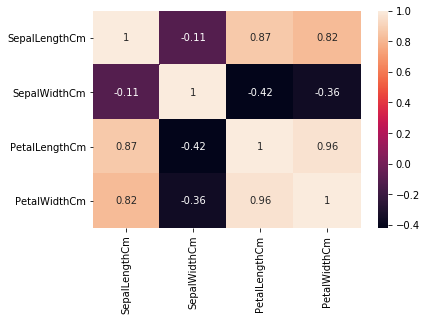

In [10]:
sns.heatmap(data.corr(),annot=True)

In [3]:
x=data[["SepalLengthCm","PetalLengthCm","PetalWidthCm"]]
y=data["Species"]

# SPLITTING DATA INTO TEST AND TRAIN DATA

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

# FEATURE SCALING

In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_test=ss.fit_transform(x_test)
x_train=ss.fit_transform(x_train)

# Machine learning Models

## Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

### MODEL TRAINING

In [29]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy on Train Data

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
ytrain_pred=model.predict(x_train)
trainaccuracy=accuracy_score(y_train,ytrain_pred)
print(trainaccuracy)

0.9553571428571429


### Output  on train data

In [32]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### CONFUSION MATRIX FOR Test data

In [33]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  9]], dtype=int64)

### ACCURACY SCORE ON Test data

In [34]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9473684210526315

### Plotting Confusion Matrix On test Data

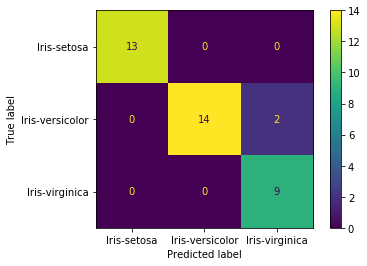

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
mat.show()

## NAIVE BAYES MODEL

In [36]:
from sklearn.naive_bayes import GaussianNB

### Model Training

In [37]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Accuracy on train data

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
ytest_pred=model.predict(x_test)
testaccuracy=accuracy_score(y_test,ytest_pred)
testaccuracy

0.868421052631579

### Output on test data

In [39]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype='<U15')

### Plotting Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [41]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 11,  5],
       [ 0,  0,  9]], dtype=int64)

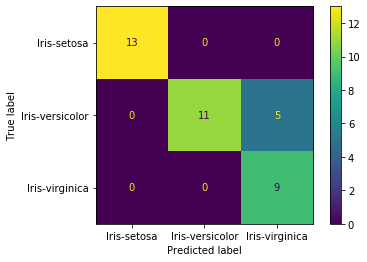

In [43]:
plot_confusion_matrix(model,x_test,y_test)
mat.show()

### Accuracy on test data

In [44]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.868421052631579

## SVC Model

In [86]:
from sklearn.svm import SVC
model=SVC(C=0.5)

### MODEL TRAINING

In [87]:
model.fit(x_test,y_test)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### ACCURACY  ON Train data

In [88]:
ytrain_pred=model.predict(x_train)
testaccuracy=accuracy_score(y_train,ytrain_pred)
testaccuracy

0.8392857142857143

### Output on Test data

In [89]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

### CONFUSION MATRIX For Test data

In [90]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  3,  6]], dtype=int64)

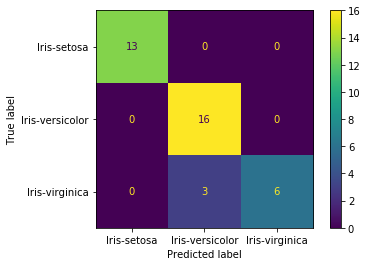

In [91]:
plot_confusion_matrix(model,x_test,y_test)
mat.show()

### ACCURACY SCORE ON Test data

In [92]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9210526315789473

In [93]:
ytrain_pred=model.predict(x_train)
test_cm=confusion_matrix(y_train,ytrain_pred)
test_cm

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0, 18, 23]], dtype=int64)

In [94]:
#here accuracy of test data is more than train data,so SVM algorithm is not suitable

## KNN CLassifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

### Model Training

In [97]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Accuracy on training Data

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
ytrain_pred=model.predict(x_train)
trainaccuracy=accuracy_score(y_train,ytrain_pred)
trainaccuracy

0.9553571428571429

### Output on test data

In [99]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### Confuson Matrix for test data

In [100]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  9]], dtype=int64)

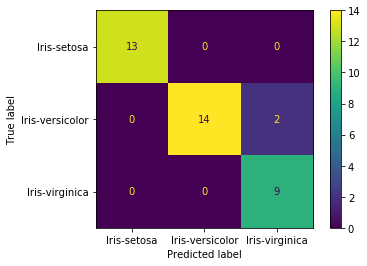

In [102]:
plot_confusion_matrix(model,x_test,y_test)

### Accuracy Score on test data

In [103]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9473684210526315